# Goal:
* Assume, for each company, that the headcount starts from zero on 2011/01/23. Estimate employee headcount, for each company, on each day, from 2011/01/24 to 2015/12/13. That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have already quit, then company headcount on 2012/03/02 for company 1 would be 1000. ** You should create a table with 3 columns: day, employee_headcount, company_id.** 
* What are the main factors that drive employee churn? Do they make sense? Explain your findings.
* If you could add to this data set just one variable that could help explain employee churn, what would that be?

# Import libraries and data

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
data = pd.read_csv("/Users/ziweili/Desktop/Collections_of_DS_FULL/Datasets/Employee_retension/employee_retention.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null object
quit_date      13510 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [7]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [75]:
data['join_date'] = pd.to_datetime(data['join_date'])
data['quit_date'] = pd.to_datetime(data['quit_date'])

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null datetime64[ns]
quit_date      13510 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 1.3+ MB


In [77]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


## Create table with mentioned values

In [82]:
unique_date = pd.date_range(start = '2011-01-24', end = '2015-12-13', freq="D")
unique_date = [pd.Timestamp(x) for x in unique_date.tolist()]
unique_date[:3]

[Timestamp('2011-01-24 00:00:00', freq='D'),
 Timestamp('2011-01-25 00:00:00', freq='D'),
 Timestamp('2011-01-26 00:00:00', freq='D')]

In [37]:
unique_company = data.company_id.unique()

In [88]:
day = []
head_count = []
company_id = []

for i in unique_company:
    for j in unique_date:
        join_n = len(data[(data['company_id'] == i) & (data['join_date'] <= j)])
        quit_n = len(data[(data['company_id'] == i) & (data['quit_date'] <= j)])
        h_count = join_n - quit_n
        day.append(j)
        head_count.append(join_n - quit_n)
        company_id.append(i)

In [93]:
count_table = pd.DataFrame({'day':day,'company_id':company_id,"head_count":head_count})
count_table = count_table.sort_values(by = ['day','company_id'], ascending=True)
count_table.head(len(unique_company))

,day,company_id,head_count
7140,2011-01-24,1,25
3570,2011-01-24,2,17
14280,2011-01-24,3,9
1785,2011-01-24,4,12
12495,2011-01-24,5,5
8925,2011-01-24,6,3
0,2011-01-24,7,1
16065,2011-01-24,8,6
5355,2011-01-24,9,3
10710,2011-01-24,10,0


# EDA

In [95]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [127]:
# Create a column to decide whether the employee will churn
data['Churn_or_Not'] = data['quit_date'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [197]:
data2 = data.copy()
data2.head(3)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,Churn_or_Not
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,0


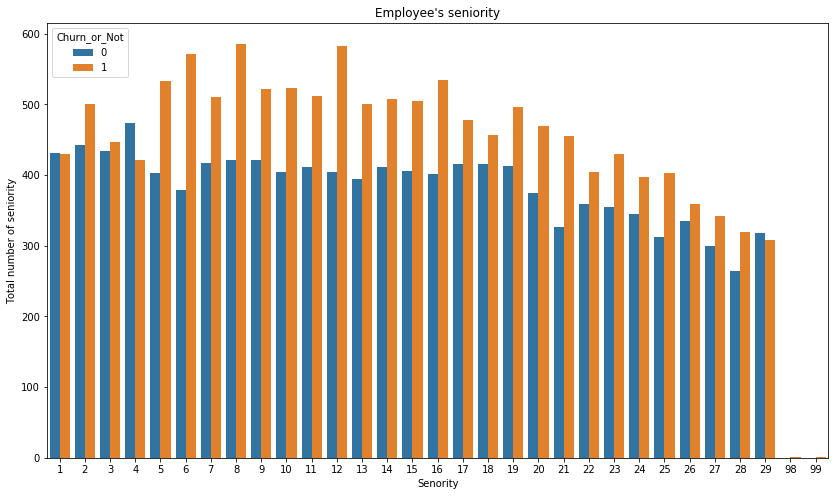

In [227]:
## What is the seniority distribution look like?
plt.figure(figsize=(14,8))
_ = sns.countplot(x = 'seniority', data=data2, hue = 'Churn_or_Not')
_ = plt.title("Employee's seniority")
_ = plt.xlabel("Senority")
_ = plt.ylabel("Total number of seniority")

From the plot, we can see that in each senority, employees were more likely to churn. So we cannot conclude that whether senority is a key factor to decide the employee would churn or not. If we want to test this, we can more data to do a hypothesis testing. <br>
Also, we can notice that some employee's senority is almost 100. So we check these values:

In [258]:
data2[data2['seniority'] > 30]

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,Churn_or_Not,Month,Year,Week,Total_Working_Days
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09,1,1,2015,2,1123.0
24701,604052.0,1,marketing,99,185000.0,2011-07-26,2013-12-06,1,12,2013,49,864.0


It might be strange to include these values. So we may think about dropping these values. <br>
Before doing this, we need to check if these outliers might influce the analysis. Since we have 24000+ observations, dropping two values will not cause so much trouble. So we can drop these.

In [259]:
## Keep dataset about each employee's seniority under 30.
data2 = data2[data2['seniority'] < 30]

In [311]:
## Split the data into churn or not churn.
churn_y = data2[data2['Churn_or_Not'] == 1]
churn_n = data2[data2['Churn_or_Not'] == 0]

In [ ]:
## What is the employee's seniority distribution look like.

Text(0.5, 1.0, 'Total employees who did not churn')

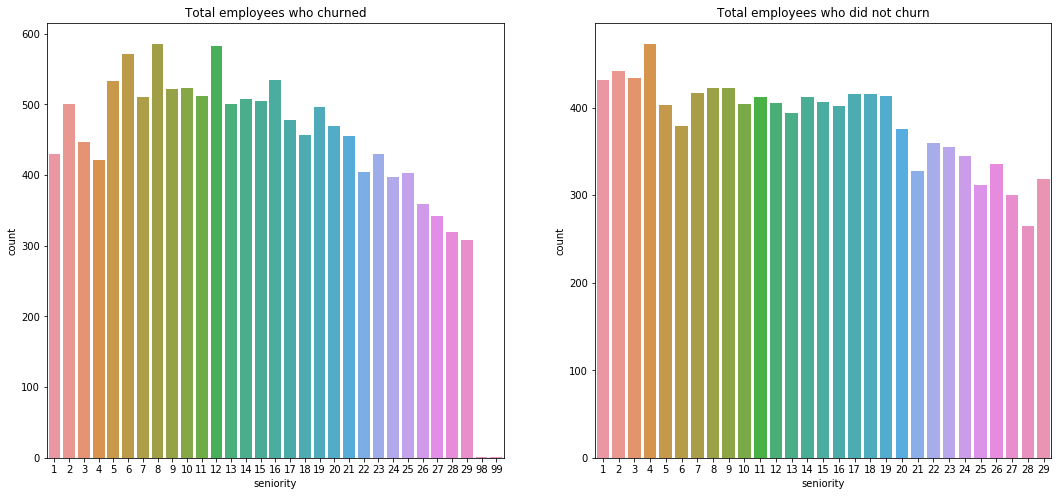

In [219]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (18,8))
sns.countplot(x = 'seniority', data=churn_y, ax = ax1)
ax1.set_title("Total employees who churned")

sns.countplot(x = 'seniority', data=churn_n, ax = ax2)
ax2.set_title("Total employees who did not churn")

It might be useful to do some statistical analysis to see if there is a significant difference between each variable. <br>
First, we need to formulate the hypothesis. <br>
As for seniority, since this variable is numerical, so we can run a two-sided Student's T-Test. ($\alpha$ = 0.05) <br>
<center> $H_0$: There is no difference in seniority. <center>
<center> $H_A$: There is difference in seniority.<center>

In [312]:
from scipy.stats import ttest_ind

In [313]:
ttest_ind(churn_y.seniority.values, churn_n.seniority.values)

Ttest_indResult(statistic=-0.04298362740450958, pvalue=0.9657149327010421)

The p-value is very big and far larger than 0.05. This means that we fail to reject the null hypothesis and conclude that there is no difference in seniority.

Text(0, 0.5, 'Number of Employees')

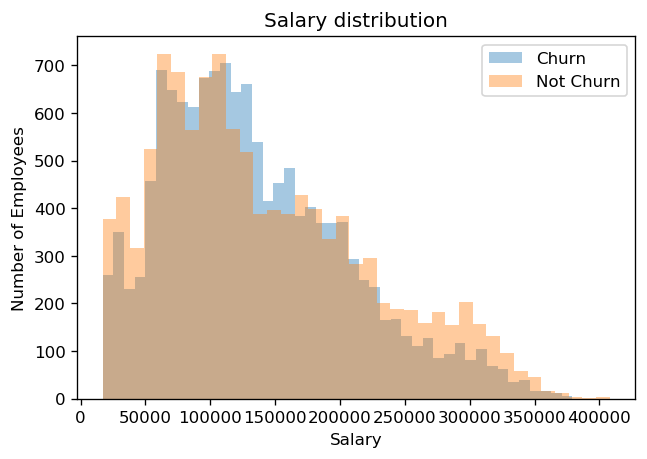

In [323]:
## What is employee's salary look like?
plt.figure(dpi = (120))
sns.distplot(churn_y['salary'],kde=False)
sns.distplot(churn_n['salary'],kde=False)
plt.legend(['Churn','Not Churn'])
plt.title("Salary distribution")
plt.xlabel("Salary")
plt.ylabel("Number of Employees")

As for the salary, from the above plot we can see that, churned employee's salary is lower than not churned. Maybe this is because that current employee is satisfied with their situation. Nothing about money motivates them to churn.
Next, we are going to run a hypothesis test to see.
<center> $H_0$: There is no difference in employee's salary.
<center> $H_A$: There is difference in employee's salary.

In [324]:
ttest_ind(churn_y.salary.values, churn_n.salary.values)

Ttest_indResult(statistic=-5.763520586411431, pvalue=8.335694924613824e-09)

From the results we can see that, the pvalue is far less than 0.05. Meaning the null hypothesis needs to be rejected. We can conclude that there is difference in employee's salary.

In [198]:
## Extract quit_date's month and year for visualization
data2['Month'] = data['quit_date'].apply(lambda x: x.month)
data2['Year'] = data['quit_date'].apply(lambda x: x.year)
data2['Week'] = data.quit_date.apply(lambda x: x.week)

In [199]:
data2['Month'] = data2['Month'].apply(lambda x: x if pd.isnull(x) else str(int(x)))
data2['Year'] = data2['Year'].apply(lambda x: x if pd.isnull(x) else str(int(x)))
data2['Week'] = data2['Week'].apply(lambda x: x if pd.isnull(x) else str(int(x)))
data2.head(3)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,Churn_or_Not,Month,Year,Week
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1,10,2015,44
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1,4,2014,14
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,0,NaN,NaN,NaN


In [236]:
total_day = []

for i in range(len(data2)):
    total = data2['quit_date'][i] - data2['join_date'][i]
    total_day.append(total.days)

In [238]:
data2['Total_Working_Days'] = total_day

In [240]:
churn_y = data2[data2['Churn_or_Not'] == 1]
churn_n = data2[data2['Churn_or_Not'] == 0]

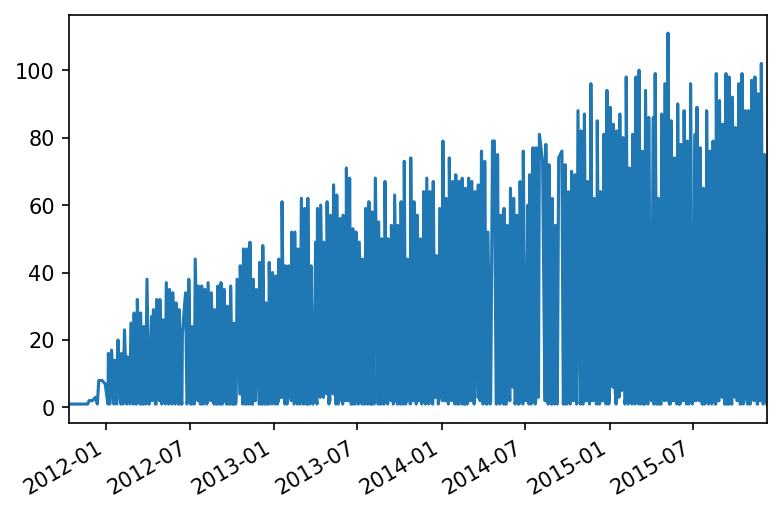

In [202]:
## What is the overall trend that employee churn.
plt.figure(dpi = (150))
data2.quit_date.sort_values(ascending = False).value_counts().plot()

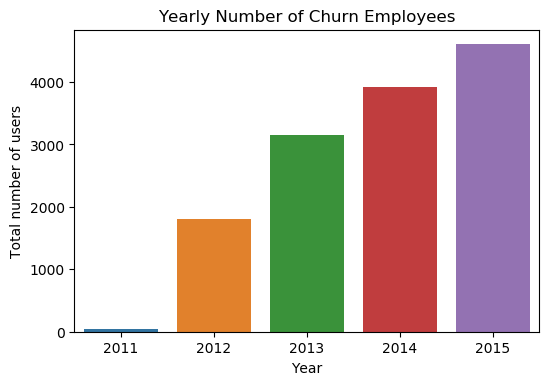

In [203]:
## In the mentioned year, what was the total number of churned employees？
plt.figure(dpi = 100)
_ = sns.countplot(x = 'Year',data = churn_y)
_ = plt.title("Yearly Number of Churn Employees")
_ = plt.xlabel("Year")
_ = plt.ylabel("Total number of users")

We can see that the overall trend in number of churned employyes shows was increasing.

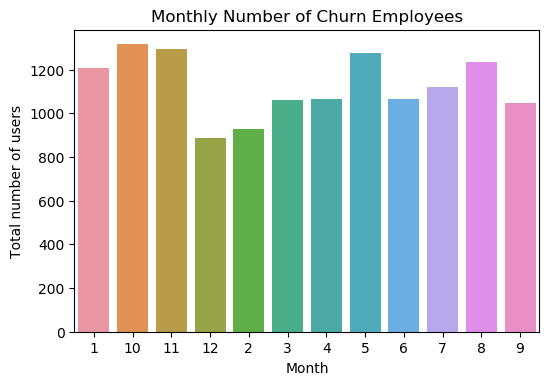

In [192]:
## In what month that the employee was most likely to churn?
plt.figure(dpi = 100)
_ = sns.countplot(x = 'Month',data = churn_y)
_ = plt.title("Monthly Number of Churn Employees")
_ = plt.xlabel("Month")
_ = plt.ylabel("Total number of users")

We can see that more employees were more likely to churn in the second half year. Especially in October and November, the number of churned employees reached to the highest.

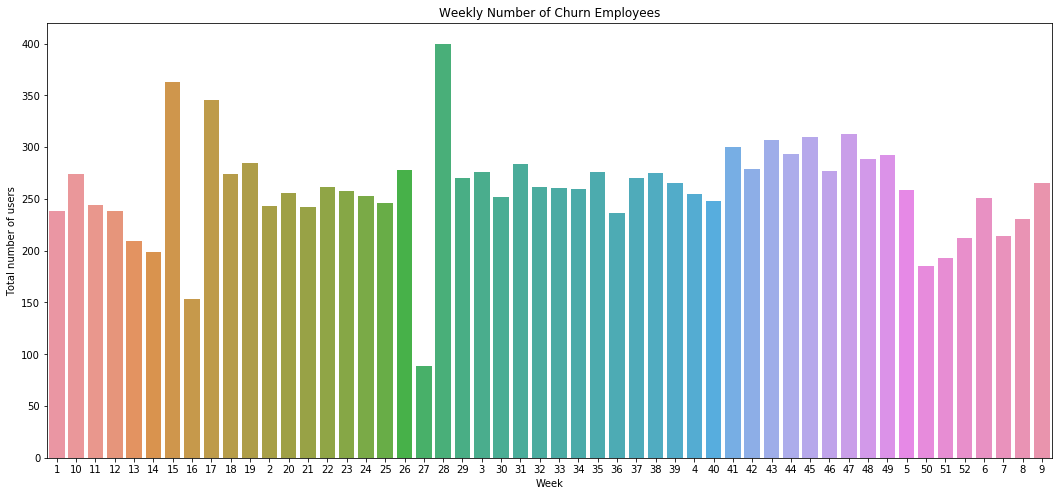

In [207]:
## What is the weekly trend that the employees were likely to churn?
plt.figure(figsize=(18,8))
_ = sns.countplot(x = 'Week',data = churn_y)
_ = plt.title("Weekly Number of Churn Employees")
_ = plt.xlabel("Week")
_ = plt.ylabel("Total number of users")

In [241]:
churn_y.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,Churn_or_Not,Month,Year,Week,Total_Working_Days
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1,10,2015,44,585.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1,4,2014,14,340.0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1,6,2013,23,389.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1,8,2014,34,1040.0
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,1,8,2013,35,578.0


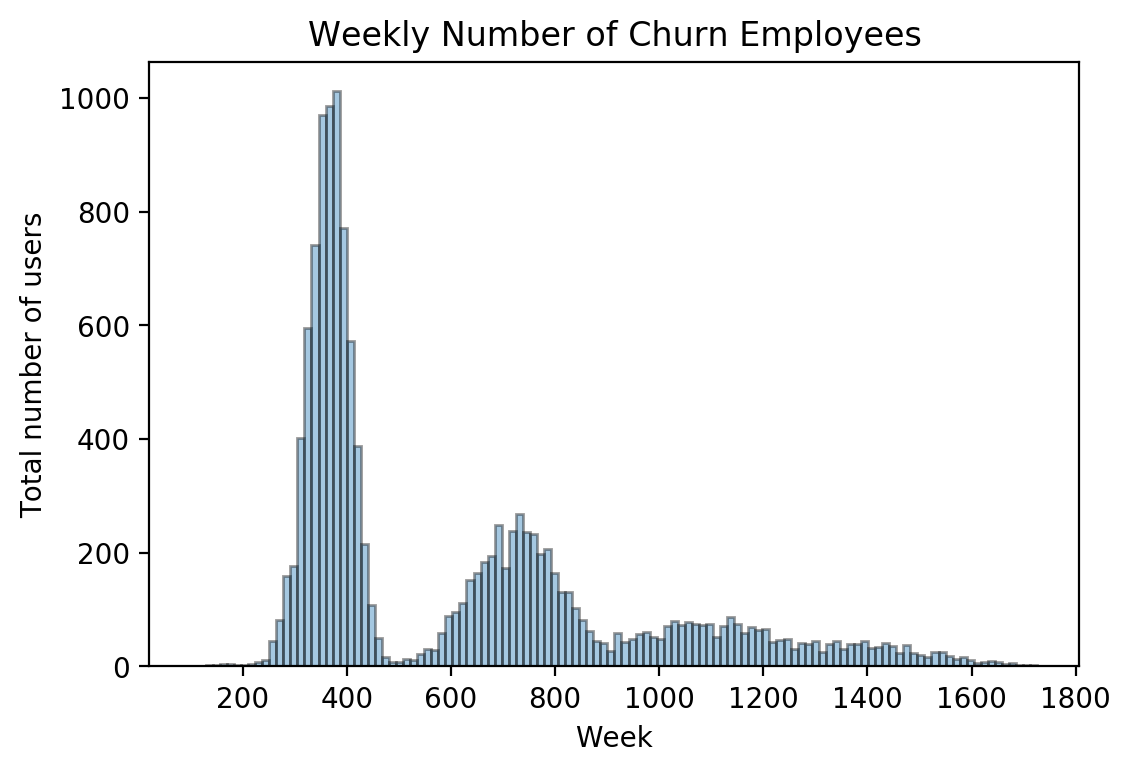

In [253]:
## How about total working days?
plt.figure(dpi = 200)
_ = sns.distplot(churn_y['Total_Working_Days'], bins = 120,kde=False,hist_kws={'histtype': 'bar','edgecolor':'black'})
_ = plt.title("Weekly Number of Churn Employees")
_ = plt.xlabel("Week")
_ = plt.ylabel("Total number of users")

# Modelling

In [286]:
data2.head(3)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,Churn_or_Not,Month,Year,Week,Total_Working_Days
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1,10,2015,44,585.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1,4,2014,14,340.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,0,NaN,NaN,NaN,NaN


In [296]:
X = data2[['company_id','dept','seniority','salary','Total_Working_Days']]
y = data2.Churn_or_Not.values

In [297]:
from sklearn.preprocessing import LabelEncoder

In [298]:
le = LabelEncoder()

X['dept_en'] = le.fit_transform(X['dept'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [299]:
X = X.drop(['dept'], axis=1)

In [300]:
from sklearn.model_selection import train_test_split

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [302]:
from xgboost import XGBClassifier

In [303]:
xgb = XGBClassifier()

In [304]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [305]:
y_pred = xgb.predict(X_test)

In [306]:
from sklearn.metrics import accuracy_score

In [307]:
accuracy_score(y_test, y_pred)

1.0

In [309]:
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [310]:
y_test

array([1, 0, 0, ..., 1, 1, 1])